In [1]:
import pandas as pd
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')
from anndata import AnnData
import sys
sys.path.append('F:/HLL/SpatialCell')
from SpatialCell.plot import stack_plot
import random
random.seed(42)

sys.path.append('F:/HLL/SpatialCell/SpatialCell')

In [41]:
import importlib
importlib.reload(sr) 
importlib.reload(annotation) 
importlib.reload(density_plot) 

<module 'SpatialCell.plot.density_plot' from 'F:\\HLL/SpatialCell\\SpatialCell\\plot\\density_plot.py'>

In [3]:
df = pd.read_csv('F:/HLL/SpatialCell/data/raw.csv', sep=",")
df.columns = df.columns.str.replace(': Cell: Mean','')
channel = ['HLA-DR','ZFP36','VIM','ZFP36L2','CD57','SPON2']
adata = AnnData(df[channel])

In [4]:
info = df.loc[:,~df.columns.isin(channel)].columns
for i in info:
    tmp = {}
    adata.obs[i] = list(df[i])

In [5]:
sc.tl.pca(adata)

In [6]:
adata.obs['Image'] = [i.split('_')[0] for i in adata.obs['Image']]

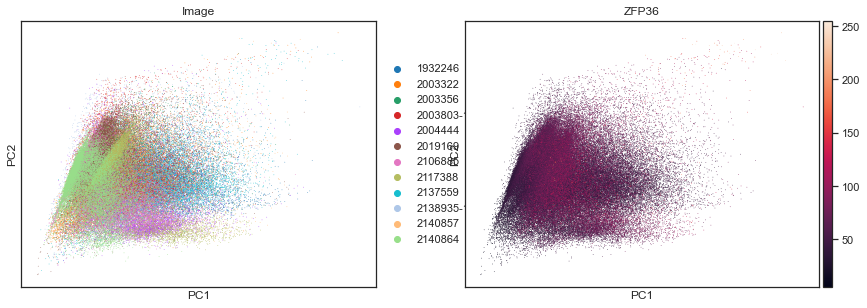

In [7]:
sc.pl.pca(
    adata,
    color=["Image", "ZFP36",],
    ncols=2,
    size=2,
)

In [8]:
adata.layers["raw"] = adata.X.copy()

In [9]:
for i in adata.obs['Image'].unique():
    sub = adata[adata.obs['Image']==i]
    sub = sr.normal(sub,channel)
    adata[adata.obs['Image']==i] = sub

In [10]:
sc.tl.pca(adata)

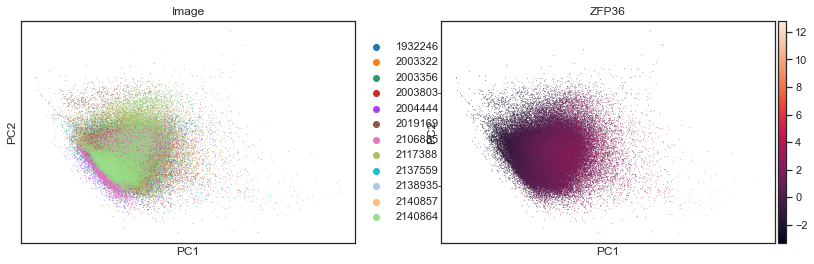

In [11]:
sc.pl.pca(
    adata,
    color=["Image", "ZFP36",],
    ncols=2,
    size=2,
)

In [12]:
conditions = [
    {"marker": ["CD57"],
    "sign": ['+']} , 
    {"marker": ["SPON2"],
    "sign": ['+']} , 
    {"marker": ["ZFP36L2"],
    "sign": ['+']},
    {"marker": ["ZFP36"],
    "sign": ['+']} , 
    {"marker": ["HLA-DR"],
    "sign": ['+']} , 
    ]

In [ ]:
import matplotlib.pyplot as plt
for condition in conditions:
    for id in adata.obs['Image'].unique():
        sub = adata[adata.obs['Image']==id]
        annotation.cellphenotype(sub ,condition , 'label', "_".join(condition['marker']),plot=True)

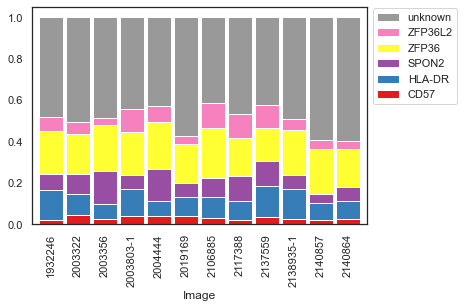

In [44]:
x_axis = 'Image'
y_axis = 'label'
stack_plot.stacked_barplot(adata, x_axis, y_axis,)

In [44]:
adata.write_h5ad('F:/HLL/SpatialCell/data/annotated.h5ad')